In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install networkx

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
twt = pd.read_csv("/content/drive/MyDrive/Stage/New Datasets/twwetsCombined.csv")

In [ ]:
twt.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,screen_name
0,1.423340e+18,1.423340e+18,2021-08-05 19:04:53 Morocco Daylight Time,8/5/2021,7:04:53 PM,100,9.522470e+17,viralvideovlogs,#StayHome,NaN,RT @Ministere_Sante: وزارة الصحة تحث المواطنات...,ar,"[{'screen_name': 'ministere_sante', 'name': 'm...",[],[],0,2,0,[],[],https://twitter.com/viralvideovlogs/status/142...,True,NaN,0,NaN,NaN,NaN,NaN,2.683723e+09,وزارة الصحة تحث المواطنات والمواطنين الذين يعا...,1.423340e+18,[],2021-08-05 19:03:32 Morocco Daylight Time,NaN,NaN,NaN,ministere_sante
1,1.423340e+18,1.423340e+18,2021-08-05 19:04:52 Morocco Daylight Time,8/5/2021,7:04:52 PM,100,1.372130e+18,vendetta_m_dima,V🇲🇦Patriote🇲🇦_VI_Retweet,NaN,RT @Ministere_Sante: وزارة الصحة تحث المواطنات...,ar,"[{'screen_name': 'ministere_sante', 'name': 'm...",[],[],0,2,0,[],[],https://twitter.com/Vendetta_M_dima/status/142...,True,NaN,0,NaN,NaN,NaN,NaN,2.683723e+09,وزارة الصحة تحث المواطنات والمواطنين الذين يعا...,1.423340e+18,[],2021-08-05 19:03:32 Morocco Daylight Time,NaN,NaN,NaN,ministere_sante
2,1.423340e+18,1.423340e+18,2021-08-05 18:31:35 Morocco Daylight Time,8/5/2021,6:31:35 PM,100,1.245440e+18,rozlbrahim,인생은 계속됩니다,NaN,"RT @Le360fr: 🇲🇦🦠 | A #Tanger, les forces de l’...",fr,"[{'screen_name': 'le360fr', 'name': 'le360', '...",[],[],0,1,0,['tanger'],[],https://twitter.com/Rozlbrahim/status/14233358...,True,NaN,0,NaN,NaN,NaN,NaN,1.010998e+09,"🇲🇦🦠 | A #Tanger, les forces de l’ordre se sont...",1.423330e+18,[],2021-08-05 18:26:15 Morocco Daylight Time,NaN,NaN,NaN,le360fr
3,1.423320e+18,1.423320e+18,2021-08-05 17:45:53 Morocco Daylight Time,8/5/2021,5:45:53 PM,100,4.604117e+09,mouhayarnajia,mhyr,NaN,RT @Khalid25666691: @Knizakenzaa #كلنا_لمحاربة...,und,"[{'screen_name': 'khalid25666691', 'name': 'kh...",[],[],0,2,0,"['كلنا_لمحاربة_كورونا', 'grippe', 'vaccins', '...",[],https://twitter.com/mouhayarnajia/status/14233...,True,NaN,0,NaN,NaN,NaN,NaN,1.405220e+18,@Knizakenzaa #كلنا_لمحاربة_كورونا \n#grippe #v...,1.423310e+18,[],2021-08-05 17:07:48 Morocco Daylight Time,NaN,NaN,NaN,khalid25666691 knizakenzaa
4,1.423320e+18,1.423320e+18,2021-08-05 17:42:41 Morocco Daylight Time,8/5/2021,5:42:41 PM,100,2.293315e+09,nouranour94,noura nour,NaN,RT @Khalid25666691: @ManalZaidi8 #كلنا_لمحاربة...,und,"[{'screen_name': 'khalid25666691', 'name': 'kh...",[],[],0,3,0,"['كلنا_لمحاربة_كورونا', 'كلنا_لمحاربة_كورونا',...",[],https://twitter.com/nouranour94/status/1423323...,True,NaN,0,NaN,NaN,NaN,NaN,1.405220e+18,@ManalZaidi8 #كلنا_لمحاربة_كورونا \n#كلنا_لمحا...,1.423320e+18,[],2021-08-05 17:18:12 Morocco Daylight Time,NaN,NaN,NaN,khalid25666691 manalzaidi8


In [ ]:
twt.shape

(4239, 37)

In [ ]:
twt.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest', 'screen_name'],
      dtype='object')

In [ ]:
twt.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,screen_name
0,1.423340e+18,1.423340e+18,2021-08-05 19:04:53 Morocco Daylight Time,8/5/2021,7:04:53 PM,100,9.522470e+17,viralvideovlogs,#StayHome,NaN,RT @Ministere_Sante: وزارة الصحة تحث المواطنات...,ar,"[{'screen_name': 'ministere_sante', 'name': 'm...",[],[],0,2,0,[],[],https://twitter.com/viralvideovlogs/status/142...,True,NaN,0,NaN,NaN,NaN,NaN,2.683723e+09,وزارة الصحة تحث المواطنات والمواطنين الذين يعا...,1.423340e+18,[],2021-08-05 19:03:32 Morocco Daylight Time,NaN,NaN,NaN,ministere_sante


In [ ]:
twt["username"].value_counts()

kmoutaib           93
rozlbrahim         82
marocamar          73
zakariael94        68
viralvideovlogs    57
                   ..
benelmouloudi       2
erkha64             2
algeriafaradase     1
haleighann00        1
lepridateur         1
Name: username, Length: 735, dtype: int64

In [ ]:
twt["tweet"].value_counts()

RT @Mediavenir: 🇲🇦 FLASH - Le #Maroc annonce la mise en place d’un #CouvreFeu national de 21h à 5h à partir de demain pour lutter contre l’…     1728
RT @Tajmaat_Service: 🇲🇦 FLASH - Explosion de nouveaux cas d’infection au #COVID19, 8995 contaminations ont été enregistré au #Maroc au cour…      117
RT @Le360fr: 🧪 | Les laboratoires privés pratiquent des prix exorbitants et leur politique tarifaire pourrait constituer un frein à la poli…       80
RT @andreflahaut: Malgré l'épreuve de #COVID19 et ses conséquences sur les célébrations, je souhaite au roi Mohammed VI, à tout le peuple #…       80
RT @helmiattia: #Tunisie : l'hôpital de circonstance de la Manouba don du #Maroc (50 lits d’oxygène et 50 lits de réa) 🇹🇳🤝🇲🇦  #COVID19  http…      72
                                                                                                                                                 ... 
RT @bbbibiya1976: @CaudeHenrion #vaccination #PasseSanitaire #PassDeLaHonte #DictatureSanitaire #Dic

## ***Start a new directed Graph***

In [ ]:
#empty graph
retweets= nx.DiGraph()

In [ ]:
#screenname of mentions splitted 
twt['splitted_users'] = twt['screen_name'].apply(lambda x: x.split(' '))

In [ ]:
twt.head(1)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,screen_name,splitted_users
0,1.423340e+18,1.423340e+18,2021-08-05 19:04:53 Morocco Daylight Time,8/5/2021,7:04:53 PM,100,9.522470e+17,viralvideovlogs,#StayHome,NaN,RT @Ministere_Sante: وزارة الصحة تحث المواطنات...,ar,"[{'screen_name': 'ministere_sante', 'name': 'm...",[],[],0,2,0,[],[],https://twitter.com/viralvideovlogs/status/142...,True,NaN,0,NaN,NaN,NaN,NaN,2.683723e+09,وزارة الصحة تحث المواطنات والمواطنين الذين يعا...,1.423340e+18,[],2021-08-05 19:03:32 Morocco Daylight Time,NaN,NaN,NaN,ministere_sante,[ministere_sante]


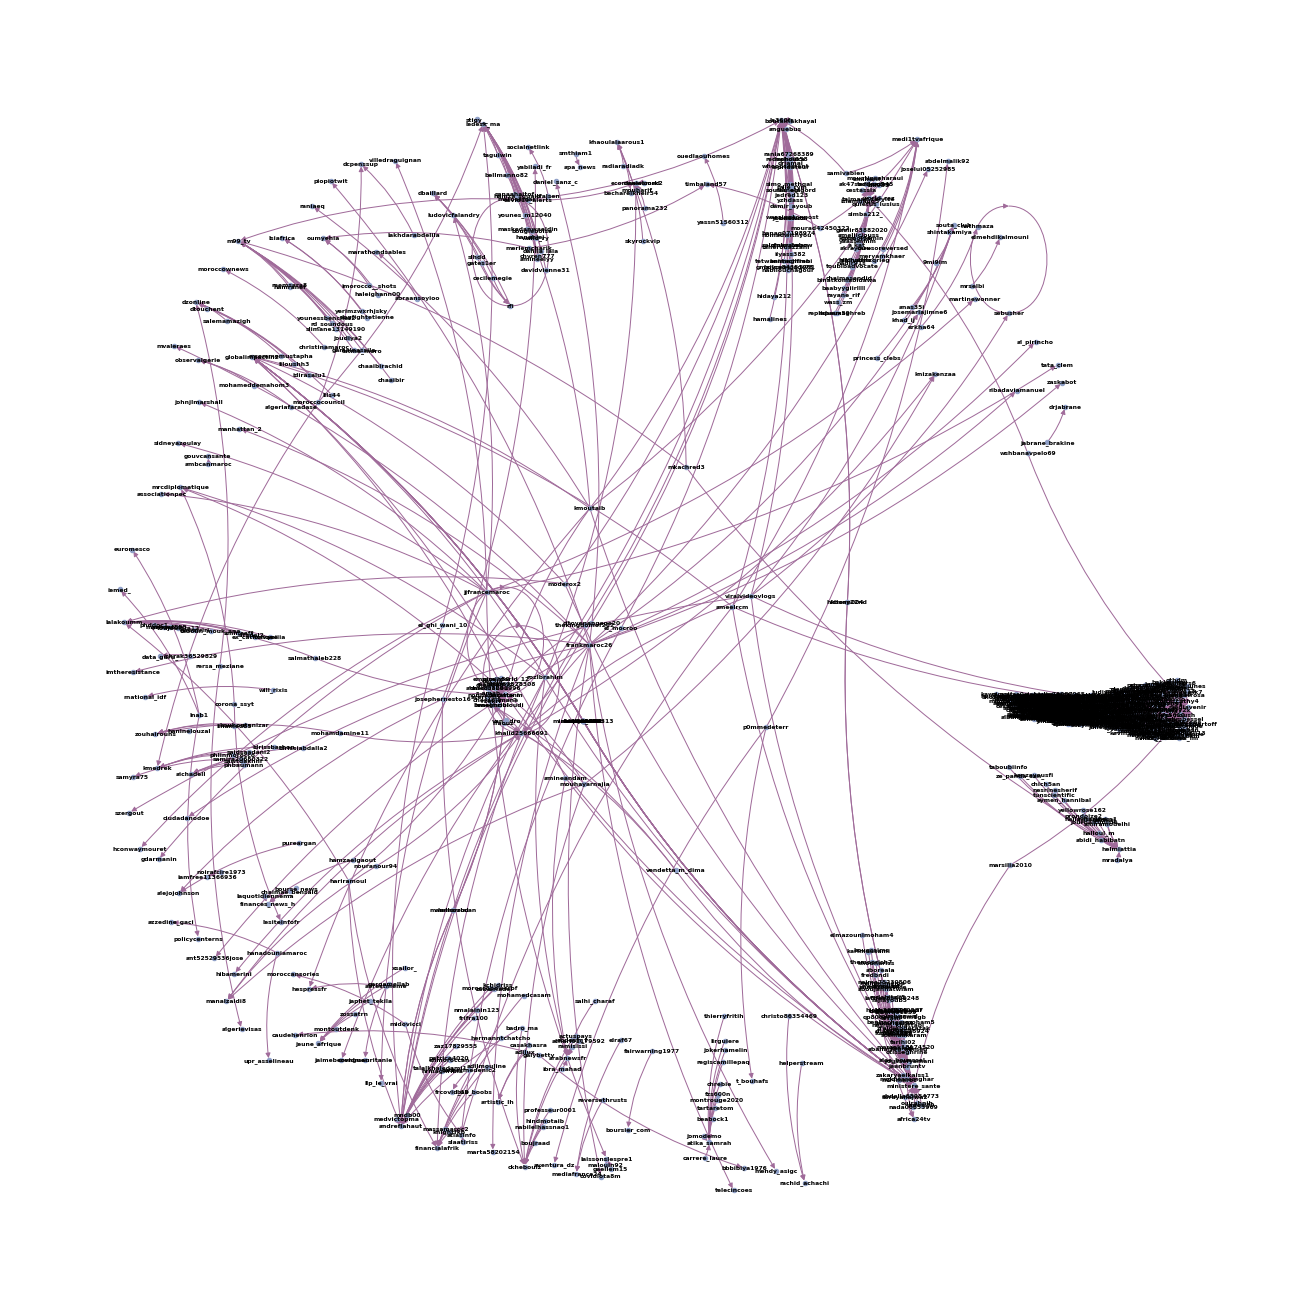

In [ ]:
G = nx.DiGraph()
for r in twt.iterrows():
    for user in r[1]['splitted_users']:
        G.add_edge(r[1]['username'], user)

plt.figure(figsize=(18,18))
nx.draw_spring(G, with_labels=True, node_color='#8d9ec6', node_size=20, edge_color="#a06b9a",style="solid", font_size=6, font_weight="bold",font_color="black",connectionstyle='arc3, rad = 0.1',)
#plt.figure(3,figsize=(100,100)) 

plt.savefig("/content/drive/MyDrive/Stage/plotAD.pdf")




In [ ]:
G.number_of_nodes()

836

In [ ]:
G.number_of_edges()

858

In [ ]:
print(nx.info(G))

DiGraph with 836 nodes and 858 edges


In [ ]:
print("Nodes:")
for node in G.nodes():
    print("\tNode:", node)
    
print("Edges:")
for edge in G.edges():
    print("\tEdge:", edge)

Nodes:
	Node: viralvideovlogs
	Node: ministere_sante
	Node: vendetta_m_dima
	Node: rozlbrahim
	Node: le360fr
	Node: mouhayarnajia
	Node: khalid25666691
	Node: knizakenzaa
	Node: nouranour94
	Node: manalzaidi8
	Node: hibamerini
	Node: hmeghribi
	Node: rfaouz
	Node: van__dro
	Node: khounariss
	Node: fredbndi
	Node: africa24tv
	Node: anguebus
	Node: citoyenengage20
	Node: nabilouchagour
	Node: akhzerouneh
	Node: globalimpactin2
	Node: marocamar
	Node: ledesk_ma
	Node: rhewadif
	Node: szergout
	Node: kmoutaib
	Node: bilco975
	Node: lmptmaroc
	Node: sanaahaitof
	Node: moderox2
	Node: davidvienne31
	Node: zmori50
	Node: smr_093
	Node: mediavenir
	Node: latifaa85400248
	Node: radya_mel
	Node: amineandam
	Node: baratto_m
	Node: aminouchet
	Node: miriam095007313
	Node: aelhattach
	Node: ameelrcm
	Node: marocfanta
	Node: marwa73911022
	Node: mohamdamine11
	Node: medi1tvafrique
	Node: simo_methqal
	Node: kbenn004
	Node: younes_m12040
	Node: zakariael94
	Node: stigy__
	Node: gaellem15
	Node: laiss

### ***Degree of each node in the graph***




In [ ]:
print("Degree of nodes:")
for D in nx.degree(G):
    print("\tDegree:", D)

Degree of nodes:
	Degree: ('viralvideovlogs', 7)
	Degree: ('ministere_sante', 69)
	Degree: ('vendetta_m_dima', 3)
	Degree: ('rozlbrahim', 8)
	Degree: ('le360fr', 43)
	Degree: ('mouhayarnajia', 5)
	Degree: ('khalid25666691', 13)
	Degree: ('knizakenzaa', 2)
	Degree: ('nouranour94', 2)
	Degree: ('manalzaidi8', 3)
	Degree: ('hibamerini', 1)
	Degree: ('hmeghribi', 5)
	Degree: ('rfaouz', 2)
	Degree: ('van__dro', 2)
	Degree: ('khounariss', 1)
	Degree: ('fredbndi', 1)
	Degree: ('africa24tv', 2)
	Degree: ('anguebus', 1)
	Degree: ('citoyenengage20', 2)
	Degree: ('nabilouchagour', 1)
	Degree: ('akhzerouneh', 2)
	Degree: ('globalimpactin2', 15)
	Degree: ('marocamar', 1)
	Degree: ('ledesk_ma', 18)
	Degree: ('rhewadif', 2)
	Degree: ('szergout', 1)
	Degree: ('kmoutaib', 8)
	Degree: ('bilco975', 2)
	Degree: ('lmptmaroc', 2)
	Degree: ('sanaahaitof', 1)
	Degree: ('moderox2', 4)
	Degree: ('davidvienne31', 1)
	Degree: ('zmori50', 1)
	Degree: ('smr_093', 1)
	Degree: ('mediavenir', 395)
	Degree: ('latifaa85

### ***In Degree / Out Degree***

In [ ]:
#in Degree : The nodes with higher indegree is more prestigious (choices received)
print("IN-Degree of nodes:")
for D in G.in_degree():
    print("\tIn Degree:", D)

IN-Degree of nodes:
	In Degree: ('viralvideovlogs', 0)
	In Degree: ('ministere_sante', 69)
	In Degree: ('vendetta_m_dima', 0)
	In Degree: ('rozlbrahim', 0)
	In Degree: ('le360fr', 43)
	In Degree: ('mouhayarnajia', 0)
	In Degree: ('khalid25666691', 8)
	In Degree: ('knizakenzaa', 2)
	In Degree: ('nouranour94', 0)
	In Degree: ('manalzaidi8', 3)
	In Degree: ('hibamerini', 1)
	In Degree: ('hmeghribi', 4)
	In Degree: ('rfaouz', 0)
	In Degree: ('van__dro', 0)
	In Degree: ('khounariss', 0)
	In Degree: ('fredbndi', 0)
	In Degree: ('africa24tv', 2)
	In Degree: ('anguebus', 0)
	In Degree: ('citoyenengage20', 0)
	In Degree: ('nabilouchagour', 0)
	In Degree: ('akhzerouneh', 0)
	In Degree: ('globalimpactin2', 15)
	In Degree: ('marocamar', 0)
	In Degree: ('ledesk_ma', 18)
	In Degree: ('rhewadif', 0)
	In Degree: ('szergout', 1)
	In Degree: ('kmoutaib', 0)
	In Degree: ('bilco975', 0)
	In Degree: ('lmptmaroc', 0)
	In Degree: ('sanaahaitof', 0)
	In Degree: ('moderox2', 0)
	In Degree: ('davidvienne31', 0)

In [ ]:
#out Degree : The nodes with higher outdegree is more central (choices made)
print("OUT-Degree of nodes:")
for D in G.out_degree():
    print("\tout Degree:", D)

OUT-Degree of nodes:
	out Degree: ('viralvideovlogs', 7)
	out Degree: ('ministere_sante', 0)
	out Degree: ('vendetta_m_dima', 3)
	out Degree: ('rozlbrahim', 8)
	out Degree: ('le360fr', 0)
	out Degree: ('mouhayarnajia', 5)
	out Degree: ('khalid25666691', 5)
	out Degree: ('knizakenzaa', 0)
	out Degree: ('nouranour94', 2)
	out Degree: ('manalzaidi8', 0)
	out Degree: ('hibamerini', 0)
	out Degree: ('hmeghribi', 1)
	out Degree: ('rfaouz', 2)
	out Degree: ('van__dro', 2)
	out Degree: ('khounariss', 1)
	out Degree: ('fredbndi', 1)
	out Degree: ('africa24tv', 0)
	out Degree: ('anguebus', 1)
	out Degree: ('citoyenengage20', 2)
	out Degree: ('nabilouchagour', 1)
	out Degree: ('akhzerouneh', 2)
	out Degree: ('globalimpactin2', 0)
	out Degree: ('marocamar', 1)
	out Degree: ('ledesk_ma', 0)
	out Degree: ('rhewadif', 2)
	out Degree: ('szergout', 0)
	out Degree: ('kmoutaib', 8)
	out Degree: ('bilco975', 2)
	out Degree: ('lmptmaroc', 2)
	out Degree: ('sanaahaitof', 1)
	out Degree: ('moderox2', 4)
	out

### ***Density of the graph***

In [ ]:
#Density of a graph is simply the ratio of actual edges in the network to all possible edges in the network
#Density is scaled from 0 to 1
nx.density(G)

0.001229120705956508

### ***Transitivity***

In [ ]:
'''
To measure closure of a graph, the structural network measure is known as transitivity. 
It is the fraction of pairs of node’s friends all possible cases. Like density, transitivity expresses how interconnected a graph is in terms of a ratio of
 actual over possible connections. Like density, transitivity is scaled from 0 and 1. 
'''
print("Global Coefficient:", nx.transitivity(G))

Global Coefficient: 0.014588859416445624


### ***Degree centrality***

In [ ]:
#Nodes with highest degree have highest degree centrality.
centrality = nx.degree_centrality(G)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[('mediavenir', 0.47305389221556887),
 ('ministere_sante', 0.08263473053892216),
 ('le360fr', 0.05149700598802395),
 ('tajmaat_service', 0.03473053892215569),
 ('baratto_m', 0.032335329341317366),
 ('andreflahaut', 0.023952095808383235),
 ('ledesk_ma', 0.02155688622754491),
 ('helmiattia', 0.02155688622754491),
 ('frankmaroc26', 0.02035928143712575),
 ('globalimpactin2', 0.017964071856287425),
 ('khalid25666691', 0.015568862275449102),
 ('lalakoumm', 0.015568862275449102),
 ('m99_tv', 0.01437125748502994),
 ('jjfrancemaroc', 0.013173652694610778),
 ('atika_samrah', 0.013173652694610778),
 ('ckhebouiz', 0.010778443113772455),
 ('rozlbrahim', 0.009580838323353293),
 ('kmoutaib', 0.009580838323353293),
 ('financialafrik', 0.009580838323353293),
 ('viralvideovlogs', 0.008383233532934131),
 ('medi1tvafrique', 0.008383233532934131),
 ('dzonline', 0.008383233532934131),
 ('ameelrcm', 0.00718562874251497),
 ('souta_club', 0.00718562874251497),
 ('rfi', 0.00718562874251497),
 ('arabnewsfr', 0.0

### ***Closeness Centrality***

In [ ]:
#Nodes with the most shortest paths have highest closeness centrality
centrality = nx.closeness_centrality(G)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[('mediavenir', 0.47305389221556887),
 ('ministere_sante', 0.08444049401197605),
 ('le360fr', 0.05149700598802395),
 ('tajmaat_service', 0.03473053892215569),
 ('globalimpactin2', 0.027337916759074446),
 ('baratto_m', 0.025825272531859362),
 ('andreflahaut', 0.023952095808383235),
 ('ledesk_ma', 0.02155688622754491),
 ('helmiattia', 0.02155688622754491),
 ('mrcdiplomatique', 0.017272497259003122),
 ('lalakoumm', 0.015568862275449102),
 ('m99_tv', 0.01437125748502994),
 ('atika_samrah', 0.013173652694610778),
 ('ckhebouiz', 0.010778443113772455),
 ('financialafrik', 0.009580838323353293),
 ('khalid25666691', 0.008383233532934131),
 ('medi1tvafrique', 0.008383233532934131),
 ('dzonline', 0.008383233532934131),
 ('souta_club', 0.00718562874251497),
 ('arabnewsfr', 0.00718562874251497),
 ('hmeghribi', 0.006387225548902195),
 ('ecomnewsmed', 0.005988023952095809),
 ('jeune_afrique', 0.005988023952095809),
 ('manalzaidi8', 0.0058959005066789505),
 ('knizakenzaa', 0.0054747647562018815),
 ('h

### ***Betweenness centrality***

In [ ]:
#Nodes that appear most often in shortest paths have highest betweenness centrality. Many paths must flow throw nodes with high betweenness
centrality = nx.betweenness_centrality(G)
[(x, centrality[x]) for x in sorted(centrality, key=centrality.get, reverse=True)]

[('baratto_m', 0.0001191860882551444),
 ('khalid25666691', 4.7387239908671866e-05),
 ('hmeghribi', 3.7335401140165716e-05),
 ('viralvideovlogs', 0.0),
 ('ministere_sante', 0.0),
 ('vendetta_m_dima', 0.0),
 ('rozlbrahim', 0.0),
 ('le360fr', 0.0),
 ('mouhayarnajia', 0.0),
 ('knizakenzaa', 0.0),
 ('nouranour94', 0.0),
 ('manalzaidi8', 0.0),
 ('hibamerini', 0.0),
 ('rfaouz', 0.0),
 ('van__dro', 0.0),
 ('khounariss', 0.0),
 ('fredbndi', 0.0),
 ('africa24tv', 0.0),
 ('anguebus', 0.0),
 ('citoyenengage20', 0.0),
 ('nabilouchagour', 0.0),
 ('akhzerouneh', 0.0),
 ('globalimpactin2', 0.0),
 ('marocamar', 0.0),
 ('ledesk_ma', 0.0),
 ('rhewadif', 0.0),
 ('szergout', 0.0),
 ('kmoutaib', 0.0),
 ('bilco975', 0.0),
 ('lmptmaroc', 0.0),
 ('sanaahaitof', 0.0),
 ('moderox2', 0.0),
 ('davidvienne31', 0.0),
 ('zmori50', 0.0),
 ('smr_093', 0.0),
 ('mediavenir', 0.0),
 ('latifaa85400248', 0.0),
 ('radya_mel', 0.0),
 ('amineandam', 0.0),
 ('aminouchet', 0.0),
 ('miriam095007313', 0.0),
 ('aelhattach', 0.0),
 

### ***Node attributes***

In [ ]:
nx.set_node_attributes(G, centrality, "centrality")

print("Nodes:")
for node in G.nodes(data=True):
    print("\tNode:", node)

Nodes:
	Node: ('viralvideovlogs', {'centrality': 0.0})
	Node: ('ministere_sante', {'centrality': 0.0})
	Node: ('vendetta_m_dima', {'centrality': 0.0})
	Node: ('rozlbrahim', {'centrality': 0.0})
	Node: ('le360fr', {'centrality': 0.0})
	Node: ('mouhayarnajia', {'centrality': 0.0})
	Node: ('khalid25666691', {'centrality': 4.7387239908671866e-05})
	Node: ('knizakenzaa', {'centrality': 0.0})
	Node: ('nouranour94', {'centrality': 0.0})
	Node: ('manalzaidi8', {'centrality': 0.0})
	Node: ('hibamerini', {'centrality': 0.0})
	Node: ('hmeghribi', {'centrality': 3.7335401140165716e-05})
	Node: ('rfaouz', {'centrality': 0.0})
	Node: ('van__dro', {'centrality': 0.0})
	Node: ('khounariss', {'centrality': 0.0})
	Node: ('fredbndi', {'centrality': 0.0})
	Node: ('africa24tv', {'centrality': 0.0})
	Node: ('anguebus', {'centrality': 0.0})
	Node: ('citoyenengage20', {'centrality': 0.0})
	Node: ('nabilouchagour', {'centrality': 0.0})
	Node: ('akhzerouneh', {'centrality': 0.0})
	Node: ('globalimpactin2', {'ce

### ***Most important Connection***

In [ ]:
most_important_bond = nx.eigenvector_centrality(G)
print(most_important_bond)

{'viralvideovlogs': 1.6217949043675663e-32, 'ministere_sante': 0.4972633830599101, 'vendetta_m_dima': 1.6217949043675663e-32, 'rozlbrahim': 1.6217949043675663e-32, 'le360fr': 6.696391160133789e-29, 'mouhayarnajia': 1.6217949043675663e-32, 'khalid25666691': 0.010279346419843138, 'knizakenzaa': 0.010279346419843138, 'nouranour94': 1.6217949043675663e-32, 'manalzaidi8': 0.010279346419843138, 'hibamerini': 0.010279346419843138, 'hmeghribi': 0.010279346419843138, 'rfaouz': 1.6217949043675663e-32, 'van__dro': 1.6217949043675663e-32, 'khounariss': 1.6217949043675663e-32, 'fredbndi': 1.6217949043675663e-32, 'africa24tv': 3.1300641654294038e-30, 'anguebus': 1.6217949043675663e-32, 'citoyenengage20': 1.6217949043675663e-32, 'nabilouchagour': 1.6217949043675663e-32, 'akhzerouneh': 1.6217949043675663e-32, 'globalimpactin2': 0.4972633830599101, 'marocamar': 1.6217949043675663e-32, 'ledesk_ma': 2.8040833896515017e-29, 'rhewadif': 1.6217949043675663e-32, 'szergout': 1.5731410572365401e-30, 'kmoutaib'

In [ ]:
#Most important
for w in sorted (most_important_bond,key=most_important_bond.get,reverse=True):
  print(w,most_important_bond[w])

baratto_m 0.5075427294797531
ministere_sante 0.4972633830599101
globalimpactin2 0.4972633830599101
mrcdiplomatique 0.4972633830599101
khalid25666691 0.010279346419843138
knizakenzaa 0.010279346419843138
manalzaidi8 0.010279346419843138
hibamerini 0.010279346419843138
hmeghribi 0.010279346419843138
dbaillard 0.005139673209921572
rfi 0.005139673209921572
sebusher 0.0025698366049607866
mediavenir 6.150008456852162e-28
le360fr 6.696391160133789e-29
tajmaat_service 4.516698808663636e-29
andreflahaut 3.115468011290068e-29
ledesk_ma 2.8040833896515017e-29
helmiattia 2.8040833896515017e-29
lalakoumm 2.0256218355550932e-29
m99_tv 1.8699295247358057e-29
atika_samrah 1.7142372139165196e-29
ckhebouiz 1.4028525922779466e-29
financialafrik 1.2471602814586603e-29
medi1tvafrique 1.091467970639374e-29
dzonline 1.091467970639374e-29
souta_club 9.35775659820087e-30
arabnewsfr 9.35775659820087e-30
ecomnewsmed 7.800833490008005e-30
jeune_afrique 7.800833490008005e-30
atlasinfo 6.243910381815129e-30
finance

### ***PageRank***

In [ ]:
pr = nx.pagerank(G, alpha=0.85)

In [ ]:
pr

{'1agfstr': 0.000670713819463019,
 '2bleunn': 0.000670713819463019,
 '3rabiaa': 0.000670713819463019,
 '78sauceaupoivre': 0.000670713819463019,
 '92fayss': 0.000670713819463019,
 '9mi9im': 0.000670713819463019,
 '___yousss': 0.000670713819463019,
 '__cvm_': 0.000670713819463019,
 '__estrl': 0.000670713819463019,
 '__flyingwords__': 0.000670713819463019,
 '__foued__': 0.000670713819463019,
 '__igabes': 0.000670713819463019,
 '__rotkiv__': 0.000670713819463019,
 '_agy_b': 0.000670713819463019,
 '_bnhj': 0.000670713819463019,
 '_dallv_': 0.000670713819463019,
 '_kts__': 0.000670713819463019,
 '_mklh_': 0.000670713819463019,
 '_priscilla_gp': 0.000670713819463019,
 '_rzekri': 0.000670713819463019,
 '_sbasma': 0.000670713819463019,
 '_srhhn': 0.000670713819463019,
 '_tomacns': 0.000670713819463019,
 '_unebylka': 0.000670713819463019,
 '_val072': 0.000670713819463019,
 'a1goodson': 0.000670713819463019,
 'a_kat__': 0.000670713819463019,
 'aaleakrz': 0.000670713819463019,
 'aarid91': 0.000670

### ***Hubs and authorities***

In [ ]:
hubs, authorities = nx.hits(G, max_iter = 50, normalized = True) 

In [ ]:
for w in sorted (hubs,key=hubs.get,reverse=True):
  print(w,hubs[w])

viralvideovlogs 0.0025901439186865735
ameelrcm 0.0025848829507856535
marsilia2010 0.002548547786943784
wshbanavpelo69 0.0025313620157256227
smr_093 0.0025244657407241743
marocfanta 0.0025244657407241743
marwa73911022 0.0025244657407241743
adriengodartoff 0.0025244657407241743
_priscilla_gp 0.0025244657407241743
artze16 0.0025244657407241743
moooouuuuaaaak 0.0025244657407241743
_kts__ 0.0025244657407241743
_val072 0.0025244657407241743
mrsowibrah 0.0025244657407241743
demas_972 0.0025244657407241743
rym__93 0.0025244657407241743
tramoisp 0.0025244657407241743
yoan32987051 0.0025244657407241743
kat17912905 0.0025244657407241743
lanoixdu24 0.0025244657407241743
eponinemg 0.0025244657407241743
popcorndor 0.0025244657407241743
pardomarcel 0.0025244657407241743
rishionthetrack 0.0025244657407241743
__igabes 0.0025244657407241743
berkaniaaa94 0.0025244657407241743
acimoviclouis 0.0025244657407241743
manel0218 0.0025244657407241743
sabryna_alg 0.0025244657407241743
maimai972x 0.002524465740724

In [ ]:
for w in sorted (authorities,key=authorities.get,reverse=True):
  print(w,authorities[w])

mediavenir 0.9633952416359641
ministere_sante 0.009190272762494962
le360fr 0.005757597354105726
globalimpactin2 0.0029809310880141
tajmaat_service 0.002631780029426236
medi1tvafrique 0.00259705966388582
khalid25666691 0.002571933444718072
souta_club 0.0025341074325642378
atlasinfo 0.002530761270270131
sebusher 0.0025083845157226454
szergout 0.0025020351753274194
baratto_m 0.0001122737350776103
andreflahaut 8.082961931039382e-05
arabnewsfr 7.805379906776441e-05
mrcdiplomatique 7.774420336866116e-05
ecomnewsmed 6.149257487074548e-05
ledesk_ma 5.522874802152589e-05
hespressfr 5.278081453823308e-05
raniaeq 5.264687423190076e-05
hmeghribi 4.991170549772288e-05
lalakoumm 4.7850560056695726e-05
financialafrik 4.7712936923301014e-05
manalzaidi8 2.0198962740628926e-05
m99_tv 1.5191185549594548e-05
knizakenzaa 1.3637635758546719e-05
ckhebouiz 7.249894407650607e-06
hibamerini 6.739244743739067e-06
timbaland57 6.607291112202895e-06
zouhairouns 6.576788320123904e-06
moroccansories 6.42223775367257e

In [ ]:
print(hubs)

{'viralvideovlogs': 0.0025901439186865735, 'ministere_sante': 0.0, 'vendetta_m_dima': 3.095228801981191e-05, 'rozlbrahim': 4.788656443080915e-05, 'le360fr': 0.0, 'mouhayarnajia': 7.141316681683942e-06, 'khalid25666691': 6.976566101736106e-06, 'knizakenzaa': 0.0, 'nouranour94': 6.792382996347658e-06, 'manalzaidi8': 0.0, 'hibamerini': 0.0, 'hmeghribi': 2.942003297683597e-07, 'rfaouz': 6.870241800202512e-06, 'van__dro': 6.870241800202512e-06, 'khounariss': 2.4082046219609395e-05, 'fredbndi': -5.682937362955633e-22, 'africa24tv': 0.0, 'anguebus': 1.5087117562094323e-05, 'citoyenengage20': 1.5298922225399865e-05, 'nabilouchagour': 1.5087117562094323e-05, 'akhzerouneh': 3.189323116419394e-05, 'globalimpactin2': 0.0, 'marocamar': 1.4472054278228791e-07, 'ledesk_ma': 0.0, 'rhewadif': 3.189323116419394e-05, 'szergout': 0.0, 'kmoutaib': 5.4500824958127536e-05, 'bilco975': 3.189323116419394e-05, 'lmptmaroc': 3.189323116419394e-05, 'sanaahaitof': 1.4472054278228791e-07, 'moderox2': 4.7105735581357

In [ ]:
print(authorities)

{'viralvideovlogs': 0.0, 'ministere_sante': 0.009190272762494962, 'vendetta_m_dima': 0.0, 'rozlbrahim': 0.0, 'le360fr': 0.005757597354105726, 'mouhayarnajia': 0.0, 'khalid25666691': 0.002571933444718072, 'knizakenzaa': 1.3637635758546719e-05, 'nouranour94': 0.0, 'manalzaidi8': 2.0198962740628926e-05, 'hibamerini': 6.739244743739067e-06, 'hmeghribi': 4.991170549772288e-05, 'rfaouz': 0.0, 'van__dro': 0.0, 'khounariss': 0.0, 'fredbndi': 0.0, 'africa24tv': -2.1687419740606753e-19, 'anguebus': 0.0, 'citoyenengage20': 0.0, 'nabilouchagour': 0.0, 'akhzerouneh': 0.0, 'globalimpactin2': 0.0029809310880141, 'marocamar': 0.0, 'ledesk_ma': 5.522874802152589e-05, 'rhewadif': 0.0, 'szergout': 0.0025020351753274194, 'kmoutaib': 0.0, 'bilco975': 0.0, 'lmptmaroc': 0.0, 'sanaahaitof': 0.0, 'moderox2': 0.0, 'davidvienne31': 0.0, 'zmori50': 0.0, 'smr_093': 0.0, 'mediavenir': 0.9633952416359641, 'latifaa85400248': 0.0, 'radya_mel': 0.0, 'amineandam': 0.0, 'baratto_m': 0.0001122737350776103, 'aminouchet': 0

### ***Communities***

- Get an undirected graph

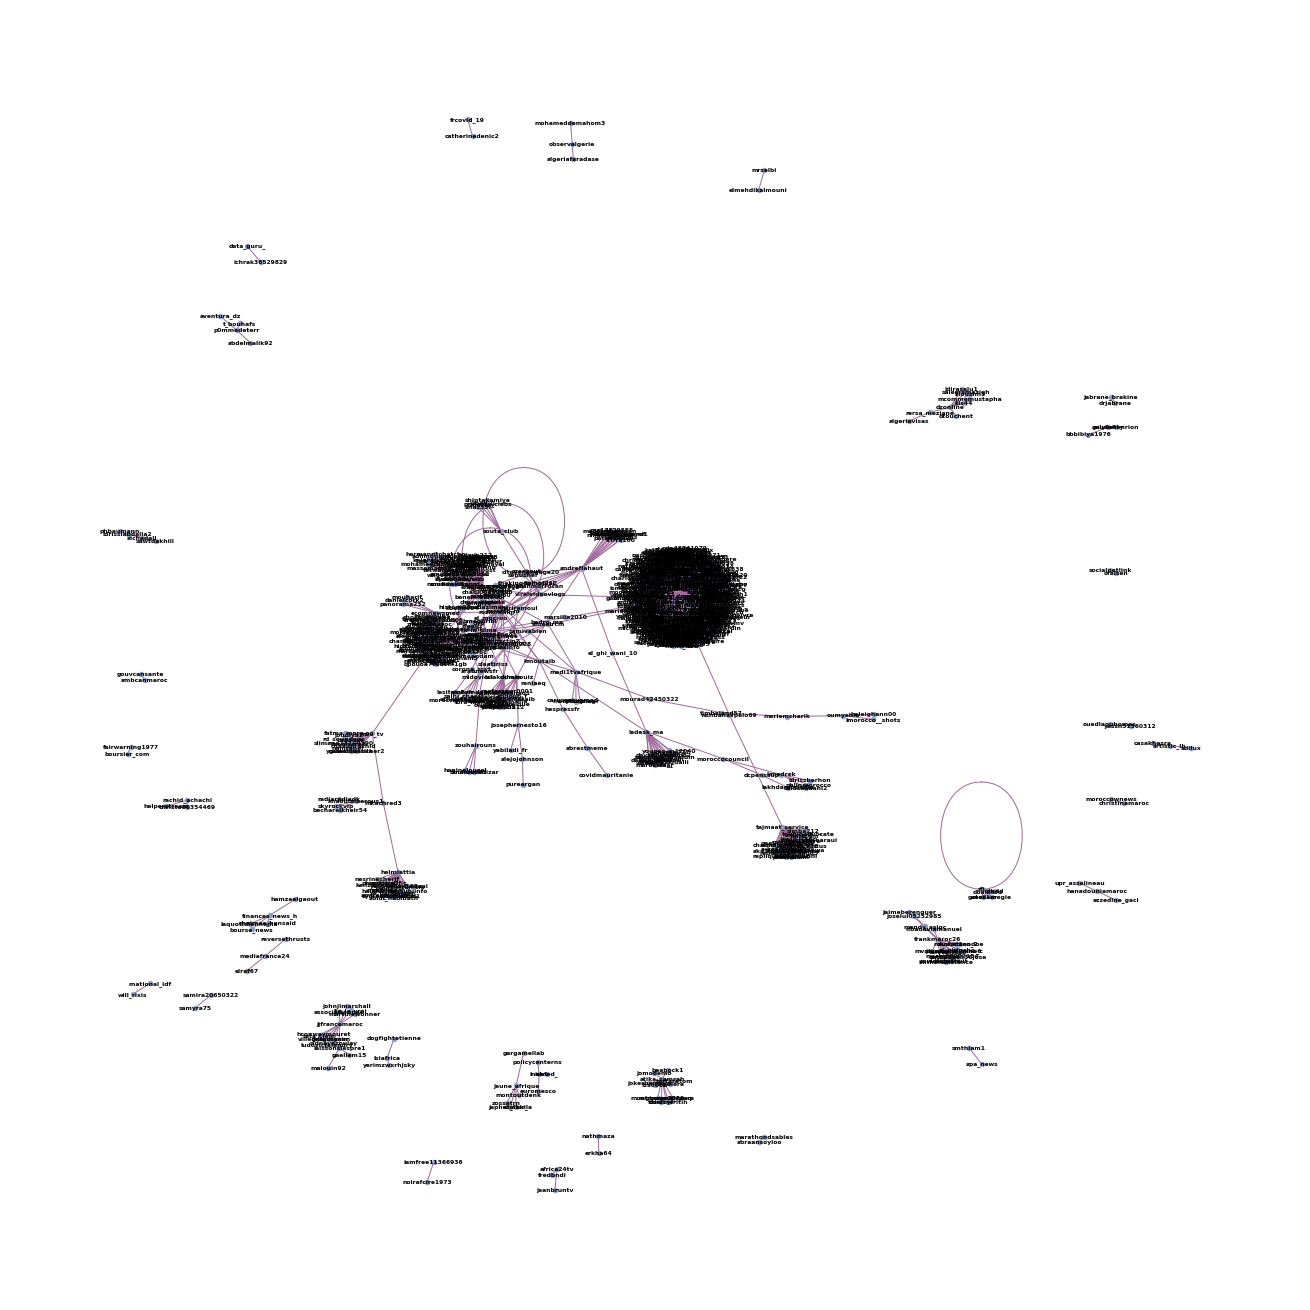

In [ ]:
Gr = nx.Graph()
for r in twt.iterrows():
    for user in r[1]['splitted_users']:
        Gr.add_edge(r[1]['username'], user)

plt.figure(figsize=(18,18))
nx.draw(Gr, with_labels=True, node_color='#8d9ec6', node_size=20, edge_color="#a06b9a",style="solid", font_size=6, font_weight="bold",font_color="black",connectionstyle='arc3, rad = 0.1',)
#plt.figure(3,figsize=(100,100)) 

#plt.savefig("/content/drive/MyDrive/Stage/plotAD2.pdf")


In [ ]:
print(nx.info(Gr))

Graph with 836 nodes and 858 edges


***- Nodes undirected Graph***

In [ ]:
print("Nodes:")
for node in Gr.nodes():
    print("\tNode:", node)
    
print("Edges:")
for edge in Gr.edges():
    print("\tEdge:", edge)

Nodes:
	Node: viralvideovlogs
	Node: ministere_sante
	Node: vendetta_m_dima
	Node: rozlbrahim
	Node: le360fr
	Node: mouhayarnajia
	Node: khalid25666691
	Node: knizakenzaa
	Node: nouranour94
	Node: manalzaidi8
	Node: hibamerini
	Node: hmeghribi
	Node: rfaouz
	Node: van__dro
	Node: khounariss
	Node: fredbndi
	Node: africa24tv
	Node: anguebus
	Node: citoyenengage20
	Node: nabilouchagour
	Node: akhzerouneh
	Node: globalimpactin2
	Node: marocamar
	Node: ledesk_ma
	Node: rhewadif
	Node: szergout
	Node: kmoutaib
	Node: bilco975
	Node: lmptmaroc
	Node: sanaahaitof
	Node: moderox2
	Node: davidvienne31
	Node: zmori50
	Node: smr_093
	Node: mediavenir
	Node: latifaa85400248
	Node: radya_mel
	Node: amineandam
	Node: baratto_m
	Node: aminouchet
	Node: miriam095007313
	Node: aelhattach
	Node: ameelrcm
	Node: marocfanta
	Node: marwa73911022
	Node: mohamdamine11
	Node: medi1tvafrique
	Node: simo_methqal
	Node: kbenn004
	Node: younes_m12040
	Node: zakariael94
	Node: stigy__
	Node: gaellem15
	Node: laiss

***-Degree of each node***

In [ ]:
print("Degree of nodes:")
for Di in nx.degree(Gr):
    print("\tDegree:", Di)

Degree of nodes:
	Degree: ('viralvideovlogs', 7)
	Degree: ('ministere_sante', 69)
	Degree: ('vendetta_m_dima', 3)
	Degree: ('rozlbrahim', 8)
	Degree: ('le360fr', 43)
	Degree: ('mouhayarnajia', 5)
	Degree: ('khalid25666691', 13)
	Degree: ('knizakenzaa', 2)
	Degree: ('nouranour94', 2)
	Degree: ('manalzaidi8', 3)
	Degree: ('hibamerini', 1)
	Degree: ('hmeghribi', 5)
	Degree: ('rfaouz', 2)
	Degree: ('van__dro', 2)
	Degree: ('khounariss', 1)
	Degree: ('fredbndi', 1)
	Degree: ('africa24tv', 2)
	Degree: ('anguebus', 1)
	Degree: ('citoyenengage20', 2)
	Degree: ('nabilouchagour', 1)
	Degree: ('akhzerouneh', 2)
	Degree: ('globalimpactin2', 15)
	Degree: ('marocamar', 1)
	Degree: ('ledesk_ma', 18)
	Degree: ('rhewadif', 2)
	Degree: ('szergout', 1)
	Degree: ('kmoutaib', 8)
	Degree: ('bilco975', 2)
	Degree: ('lmptmaroc', 2)
	Degree: ('sanaahaitof', 1)
	Degree: ('moderox2', 4)
	Degree: ('davidvienne31', 1)
	Degree: ('zmori50', 1)
	Degree: ('smr_093', 1)
	Degree: ('mediavenir', 395)
	Degree: ('latifaa85

In [ ]:
from networkx.algorithms.community.centrality import girvan_newman

In [ ]:
#undirected graph
communities = girvan_newman(Gr)

In [ ]:
#directed graph
communities1 = girvan_newman(G)

In [ ]:
node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

[['mehdib58', 'anas35i', 'rozlbrahim', 'prondoize2', 'history22nd', 'helmiattia', 'benelmouloudi', 'taherouazzani', 'halloul_m', 'sanaahaitof', 'bougieboise', 'el_ghi_wani_10', 'hariramoul', 'younes_m12040', 'maskedanwaeldin', 'sorayanajwa2', 'frifra100', 'nada00853969', 'nabilouchagour', 'zmori50', 'rajiayoub5', 'abahaffou_ahmed', 'whoopsement', 's_amah', 'blitzqrieg', 'hibamerini', 'lesiteinfofr', 'nomadwithyou', 'abalalli', 'der3ia', 'empire_world_12', 'taguiwin', 'citoyenengage20', 'abdouh_f', 'bernie1818', 'houchnawal', 'mokhtaramghar', 'tetwanimaghrebi', 'rfaouz', 'm24maroc', 'manalzaidi8', 'kchidriss', 'dcpenssup', '_rzekri', 'le360fr', 'linamed85', 'mamanmema', 'princess_clebs', 'hamza_squalli', 'chaaibirachid', 'yellowrose162', 'chich5an', 'van__dro', 'medvictopma', 'f_bellouch', 'ameelrcm', 'salhi_charaf', 'nesrin_khattabi', 'moroccopowerof', 'midovicci', 'souta_club', 'akhzerouneh', 'drjamai', 'nesrinesherif', 'amiramouelhi', 'younewzz', 'amineandam', 'bouqssims', 'bob_boobs

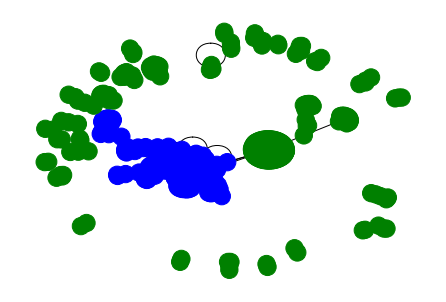

In [ ]:
color_map = []
for node in Gr:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(Gr, node_color=color_map, with_labels=False)
plt.show()

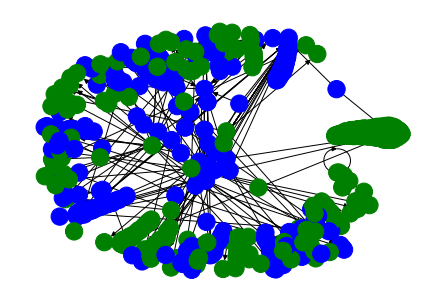

In [ ]:
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

In [ ]:
nx.number_connected_components(Gr)

34

### ***Parallel Betweenness Centrality***

- In a social network, it is crucial to determine who is the most “important” individual. And individual’s betweenness is one of the ways to define “importance”. The betweenness centrality is to measure the number of shortest paths pass through a vertex. The more shortest paths that pass through the vertex, the more central the vertex is to the network. 

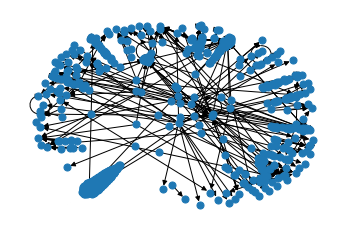

In [ ]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx(G, pos = spring_pos, with_labels = False, node_size = 50)

In [ ]:
nx.write_gexf(G, "/content/drive/MyDrive/Stage/test.gexf")

In [ ]:
nx.write_gexf(Gr, "/content/drive/MyDrive/Stage/test1.gexf")

### ***Community Detection***

In [ ]:
!pip install python-louvain

In [ ]:
pip install --upgrade networkx

In [ ]:
plt.savefig("plot.png",dpi=600,bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>